# 가사 데이터 크롤링 후 데이터 분석 및 시각화

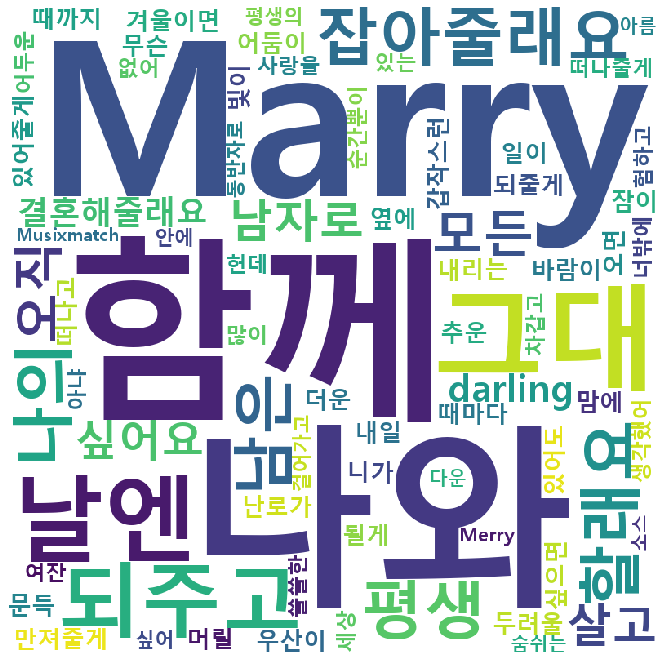

In [62]:
# 라이브러리 import
from selenium import webdriver
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# selenium을 이용해 웹 자동화를 위한 webdriver 연동

# 크롬 세션 열기 및 접속
chromedriver = './chromedriver.exe'
driver = webdriver.Chrome(chromedriver) # 빈 브라우저 생성
driver.get('https://www.google.com/')

driver.implicitly_wait(1) # 브라우저 대기 , # 브라우저 자체가 웹 요소들을 기다리도록 만들어주는 옵션

# 검색 키워드 입력
search_btn = driver.find_element_by_xpath('/html/body/div/div[2]/form/div[2]/div[1]/div[1]/div/div[2]/input')
search_btn.send_keys('marry me 가사')

driver.implicitly_wait(1) # 브라우저 대기
search_btn.submit()

# 더보기 버튼 클릭하기
driver.implicitly_wait(1) # 브라우저 대기
driver.find_element_by_xpath('/html/body/div[5]/div[2]/div[9]/div[1]/div[2]/div/div[2]/div[2]/div/div/div[1]/div[1]/div[1]/div').click()

# 가사 가져오기
song = driver.find_element_by_xpath('/html/body/div[5]/div[2]/div[9]/div[1]/div[2]/div/div[2]/div[2]/div/div/div[1]/div[1]/div[1]/span/div/div/div[2]/div/div/div/div').text

# 텍스트 파일에 저장
f = open('song.txt', mode = 'wt', encoding = 'utf-8') # 쓰기 형태
f.write(song) # 가사 쓰기
f.close() # 파일 객체를 닫기

# 파일 불러오기
f = open('song.txt', mode = 'rt', encoding = 'utf-8')
lyrics = f.read()
f.close()

# 빈도 수 분석

lyrics_dict = dict() # 빈 리스트 선언
for ele in lyrics.split('\n'):
    words = ele.split(' ') # 단어로 자르기
    for word in words:
        if word in lyrics_dict: # 해당 단어가 반복되는지 판별
            lyrics_dict[word] += 1
        else:
            lyrics_dict[word] = 1

# print(lyrics_dict)
            
# wordcloud setting
font_path = "c:\\font\\malgunbd.ttf"

wordcloud =WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color = 'white'
     )

# 가사를 wordcloud에 넣기
wordcloud = wordcloud.generate(lyrics)

# 시각화
fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [63]:
wordcloud.words_

{'Marry': 1.0,
 '함께': 0.8,
 '나와': 0.8,
 '그대': 0.6,
 '날엔': 0.4,
 '되주고': 0.4,
 '잡아줄래요': 0.4,
 '평생': 0.4,
 '할래요': 0.4,
 '남은': 0.4,
 '나의': 0.4,
 '모든': 0.4,
 '오직': 0.4,
 '남자로': 0.4,
 '살고': 0.4,
 '싶어요': 0.4,
 'darling': 0.4,
 '결혼해줄래요': 0.4,
 '내리는': 0.2,
 '우산이': 0.2,
 '어둠이': 0.2,
 '오면': 0.2,
 '빛이': 0.2,
 '되줄게': 0.2,
 '추운': 0.2,
 '겨울이면': 0.2,
 '난로가': 0.2,
 '더운': 0.2,
 '바람이': 0.2,
 '될게': 0.2,
 '잠이': 0.2,
 '때까지': 0.2,
 '머릴': 0.2,
 '만져줄게': 0.2,
 '니가': 0.2,
 '두려울': 0.2,
 '때마다': 0.2,
 '옆에': 0.2,
 '있어줄게': 0.2,
 '갑작스런': 0.2,
 '맘에': 0.2,
 '문득': 0.2,
 '떠나고': 0.2,
 '싶으면': 0.2,
 '내일': 0.2,
 '무슨': 0.2,
 '일이': 0.2,
 '있어도': 0.2,
 '떠나줄게': 0.2,
 '순간뿐이': 0.2,
 '아냐': 0.2,
 '많이': 0.2,
 '생각했어': 0.2,
 '헌데': 0.2,
 '사랑을': 0.2,
 '있는': 0.2,
 '여잔': 0.2,
 '너밖에': 0.2,
 '없어': 0.2,
 '차갑고': 0.2,
 '어두운': 0.2,
 '험하고': 0.2,
 '쓸쓸한': 0.2,
 '세상': 0.2,
 '평생의': 0.2,
 '동반자로': 0.2,
 '걸어가고': 0.2,
 '싶어': 0.2,
 'Merry': 0.2,
 '안에': 0.2,
 '숨쉬는': 0.2,
 '아름': 0.2,
 '다운': 0.2,
 '소스': 0.2,
 'Musixmatch': 0.2}